<a href="https://colab.research.google.com/github/mai953/mai953-DataScience-GenAI-Submissions/blob/main/Mock_test_seminar_w7_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, I want to upload the file to Google Collab to work on the task.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import files
upload = files.upload()

Saving EDA-DP.txt to EDA-DP.txt


I want to look at a sample of data (the first 5 rows) to have a general understanding of the data I am working with as well as choosing what I will explore further. I fed this into Gemini "Please load EDA-DP.csv into a pandas DataFrame named `df` and display the first 5 rows to get a general understanding of the data."

In [ ]:
df = pd.read_csv('EDA-DP.txt')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [ ]:
print(f"Total number of missing values: {df.isnull().sum().sum()}")

Total number of missing values: 0


Firstly, I want to find out the number of different classes in each feature. This would help me with further data exploration. So I prompted Gemini with "Can you help me find out the number of unique classes for each feature in the DataFrame `df`?"

In [ ]:
print("Number of unique classes in each feature:")
print(df.nunique())

Number of unique classes in each feature:
work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64


I want to explore the distribution of each feature, so I prompted Gemini with

Generating distribution plots for the following features:
['work_year', 'experience_level', 'employment_type', 'salary_currency', 'remote_ratio', 'company_size']


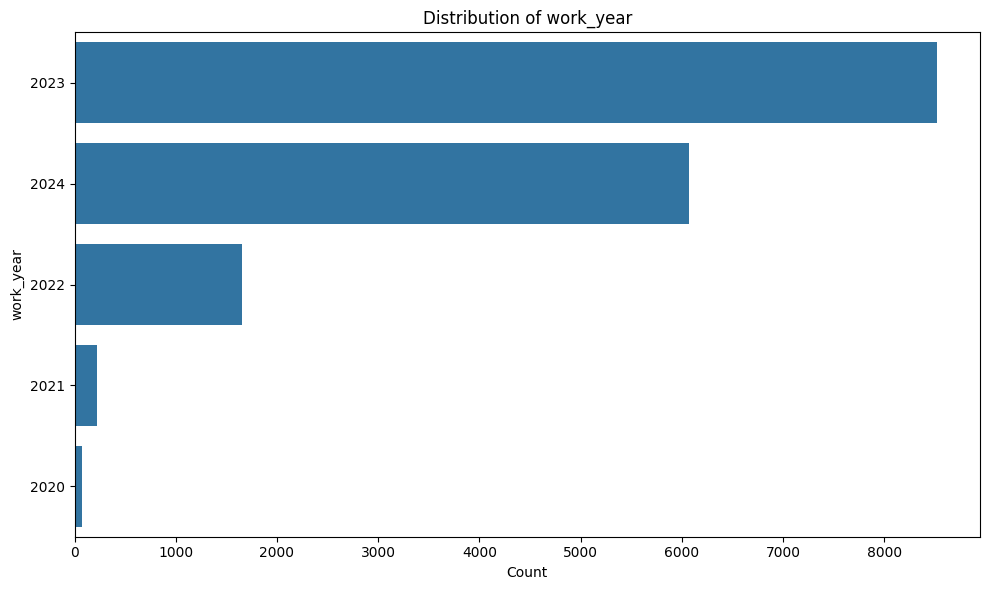

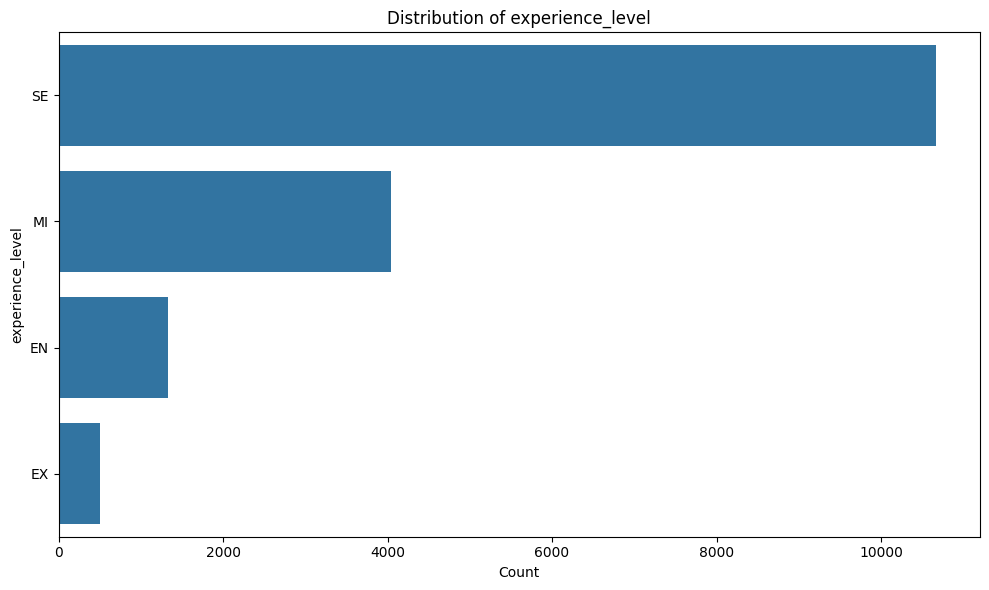

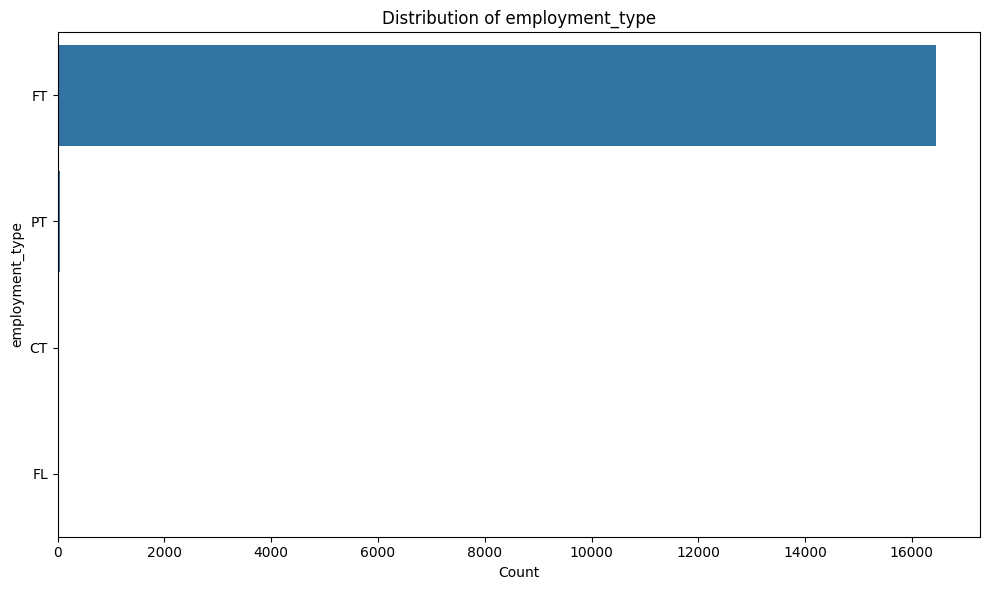

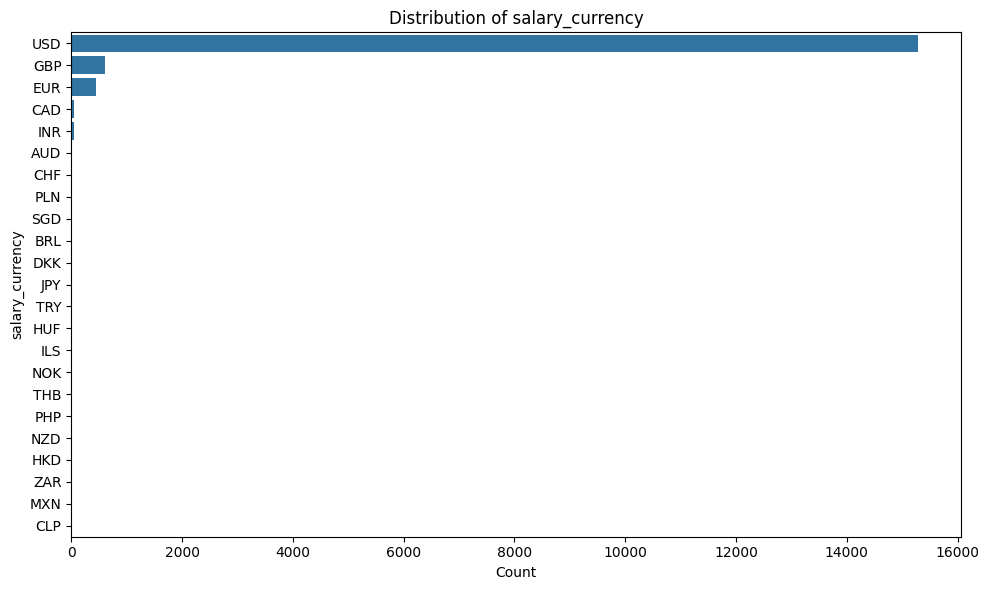

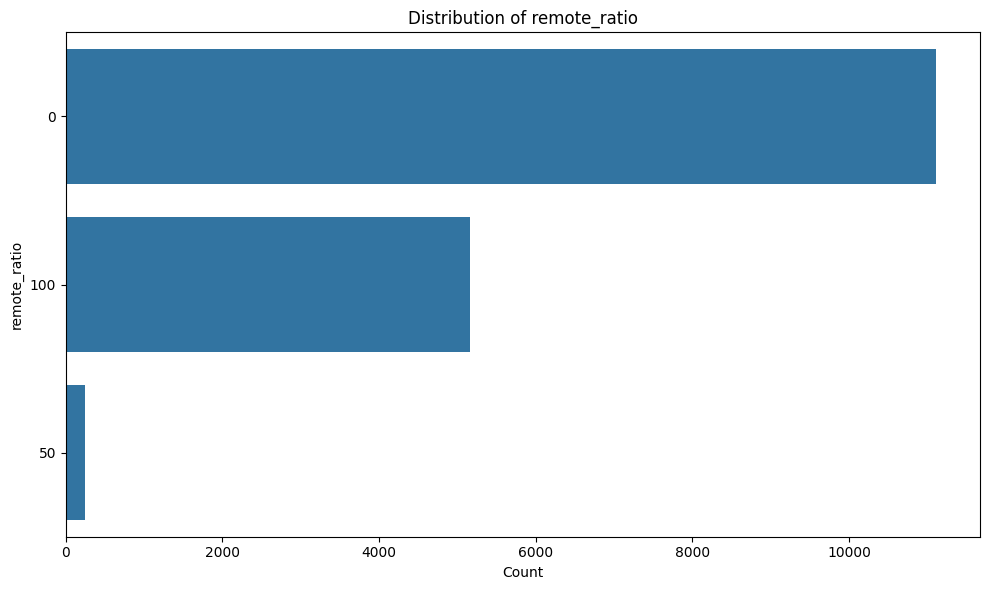

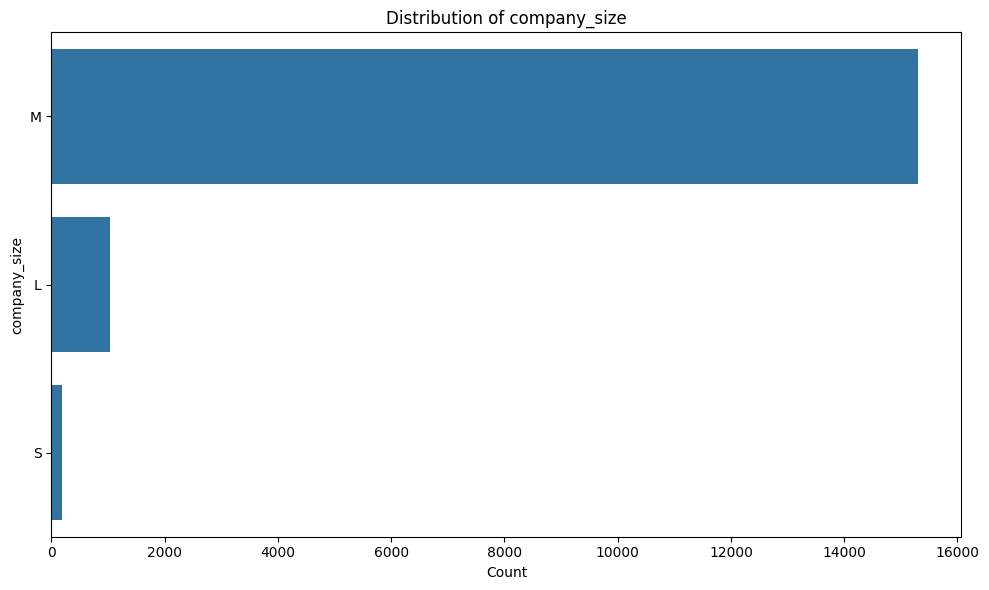


Features with too many unique values to visualize effectively with count plots (skipped):
['job_title', 'salary', 'salary_in_usd', 'employee_residence', 'company_location']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of unique values for each feature
unique_counts = df.nunique()

# Select features with a relatively small number of unique values for count plots
# A threshold of 25 is chosen as a reasonable upper limit for readability in count plots
features_for_countplot = unique_counts[unique_counts <= 25].index.tolist()

print("Generating distribution plots for the following features:")
print(features_for_countplot)

for feature in features_for_countplot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

print("\nFeatures with too many unique values to visualize effectively with count plots (skipped):")
features_skipped = unique_counts[unique_counts > 25].index.tolist()
print(features_skipped)

This shows that there are a wide range of salary for different job title thus I want to explore something more specific, for example employment type and categories.

**Approach:**
I would like to explore full time workers specificially and explore different features in regarding to it.

I see that the range of salary in USD for full time job are much wider compared to other employment type. Therefore, I will ask Toogle Gemini to plot a graph comparing salary in USD for full time workers.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary in USD by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Since full time workers have the widest range of data, I decide to explore the relationship between full time workers and salary in USD deeper and visualise it.

**Prompt:**
Therefore, before visualizing the salary distribution for this specific group, I prompted Gemini with " Please create a new DataFrame called `full_time_df` that only contains records where the 'employment_type' is 'FT'".

In [ ]:
full_time_df = df[df['employment_type'] == 'FT']
print("DataFrame 'full_time_df' created, containing only full-time employees.")

DataFrame 'full_time_df' created, containing only full-time employees.


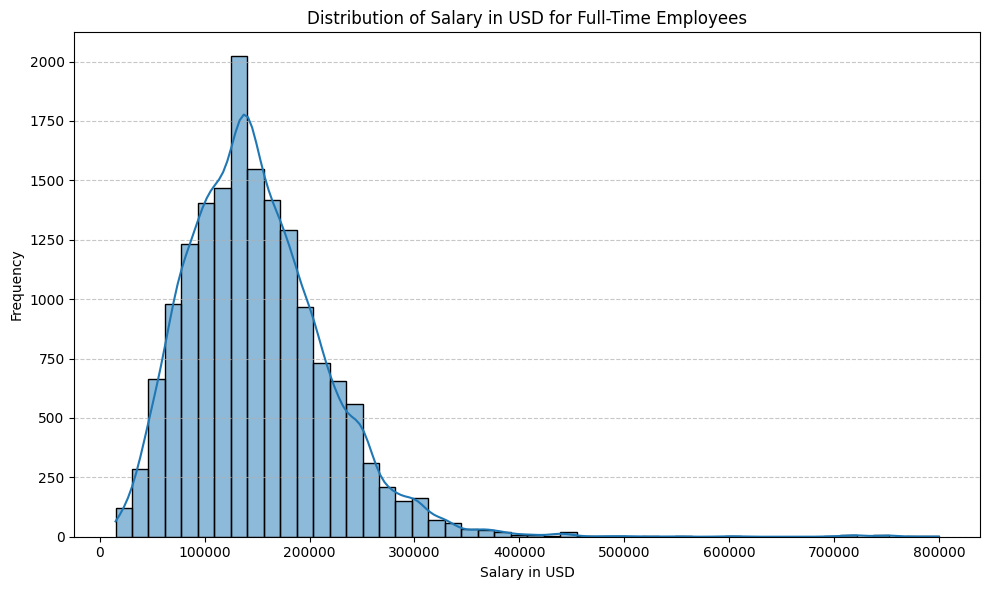

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(full_time_df['salary_in_usd'], kde=True, bins=50)
plt.title('Distribution of Salary in USD for Full-Time Employees')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Included prompt**
Within full time professionals, I want to explore salary in usd across different experience level for full-time employees. I prompted Gemini to generate a box plot to compare 'salary_in_usd' across different 'experience_level' categories for full-time employees, ordered by experience level.

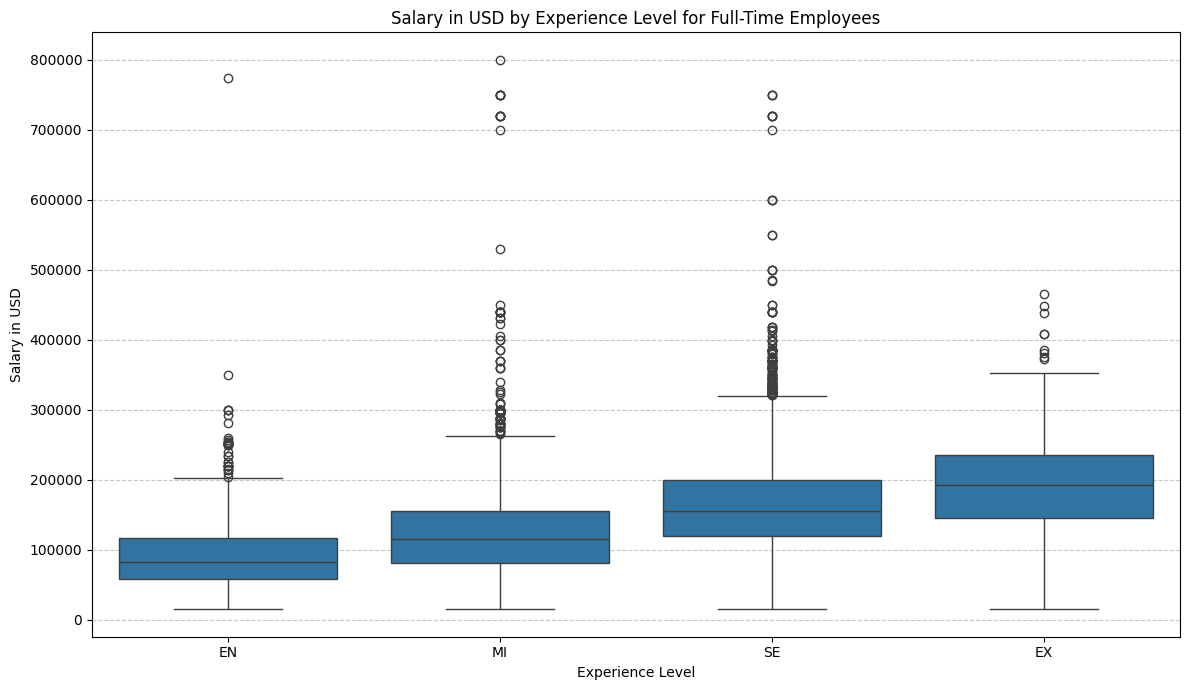

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='experience_level', y='salary_in_usd', data=full_time_df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salary in USD by Experience Level for Full-Time Employees')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now, I want to understand how company size affects salary in usd for full time workers. I prompted gemini with: "Create box plots or violin plots to visualize the 'salary_in_usd' distribution across different 'company_size' categories for full-time employees, helping to understand if company size influences salary."


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=full_time_df, order=['S', 'M', 'L'])
plt.title('Salary in USD by Company Size for Full-Time Employees')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Investigate Top Job Titles by Salary (Full-Time)

### Subtask:
Since 'job_title' has many unique values, identify the top N (e.g., top 10-20) job titles with the highest average or median salaries among full-time employees, and then visualize their salary distributions using bar charts or box plots.


**Prompt**:
"Identify the top 10 job titles with the highest median 'salary_in_usd' among full-time employees and create a filtered DataFrame containing only these job titles."



In [ ]:
median_salaries = full_time_df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)
top_10_job_titles = median_salaries.head(10).index.tolist()

print("Top 10 Job Titles by Median Salary:")
for i, title in enumerate(top_10_job_titles):
    print(f"{i+1}. {title}")

filtered_df_top_jobs = full_time_df[full_time_df['job_title'].isin(top_10_job_titles)]
print("\nDataFrame 'filtered_df_top_jobs' created, containing only top 10 job titles.")

Top 10 Job Titles by Median Salary:
1. Analytics Engineering Manager
2. Data Science Tech Lead
3. Head of Machine Learning
4. Managing Director Data Science
5. AWS Data Architect
6. Cloud Data Architect
7. Director of Data Science
8. Head of Data
9. AI Architect
10. Prompt Engineer

DataFrame 'filtered_df_top_jobs' created, containing only top 10 job titles.


Now, I want to visualise the top jobs data and prompted Gemini with Visualize the salary distribution for the top 10 job titles (by median salary) for full-time employees using a box plot.


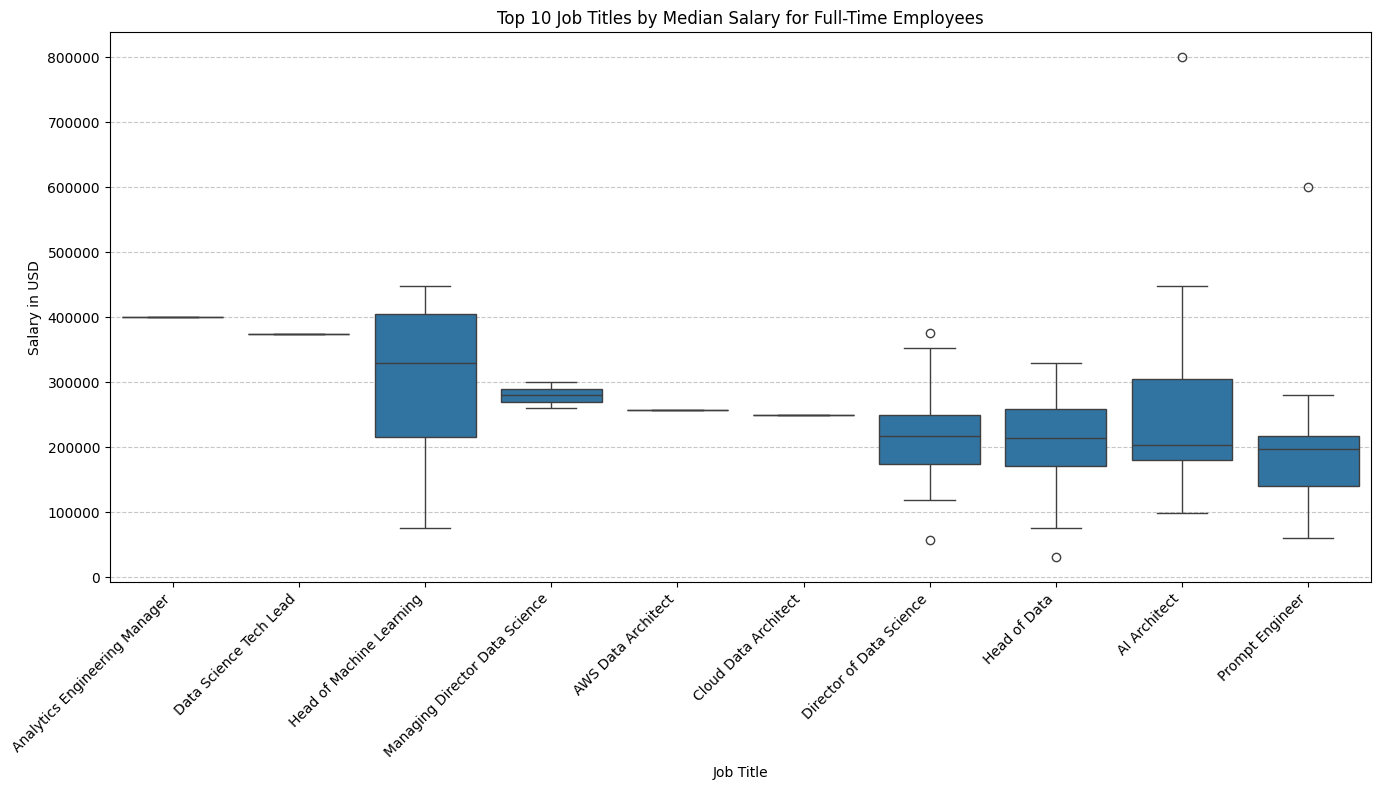

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='job_title', y='salary_in_usd', data=filtered_df_top_jobs, order=top_10_job_titles)
plt.title('Top 10 Job Titles by Median Salary for Full-Time Employees')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Explore Top Company Locations by Salary (Full-Time)**

Similar to job titles, I Want to explore company locations with the salaries for full-time employees, and visualize their salary distributions to uncover geographical salary trends.


**2 Prompts I used:**
Identify the top 10 company locations with the highest median 'salary_in_usd' for full-time employees and create a filtered DataFrame containing only these locations.

Visualize the salary distribution for the top 10 company locations (by median salary) for full-time employees using a box plot.

**Reasoning**:
I need to calculate the median salary for each company location within the `full_time_df` and identify the top 10 locations based on these median salaries. This is the first step towards filtering the data for the visualization as specified in the instructions.



In [ ]:
median_salaries_location = full_time_df.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False)
top_10_locations = median_salaries_location.head(10).index.tolist()

print("Top 10 Company Locations by Median Salary:")
for i, location in enumerate(top_10_locations):
    print(f"{i+1}. {location}")

filtered_df_top_locations = full_time_df[full_time_df['company_location'].isin(top_10_locations)]
print("\nDataFrame 'filtered_df_top_locations' created, containing only top 10 company locations.")

**Reasoning**:
Now that the `filtered_df_top_locations` DataFrame has been created, I will use it to generate a box plot visualizing the salary distribution for the top 10 company locations, ordered by their median salary, as instructed in the subtask.



In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='company_location', y='salary_in_usd', data=filtered_df_top_locations, order=top_10_locations)
plt.title('Top 10 Company Locations by Median Salary for Full-Time Employees')
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

I want to explore the work year with salary for full-time workers.


**Prompt for Gemini: **
Calculate the median 'salary_in_usd' for each 'work_year' for full-time employees and then create a line plot to show the trend of median salary over the years.

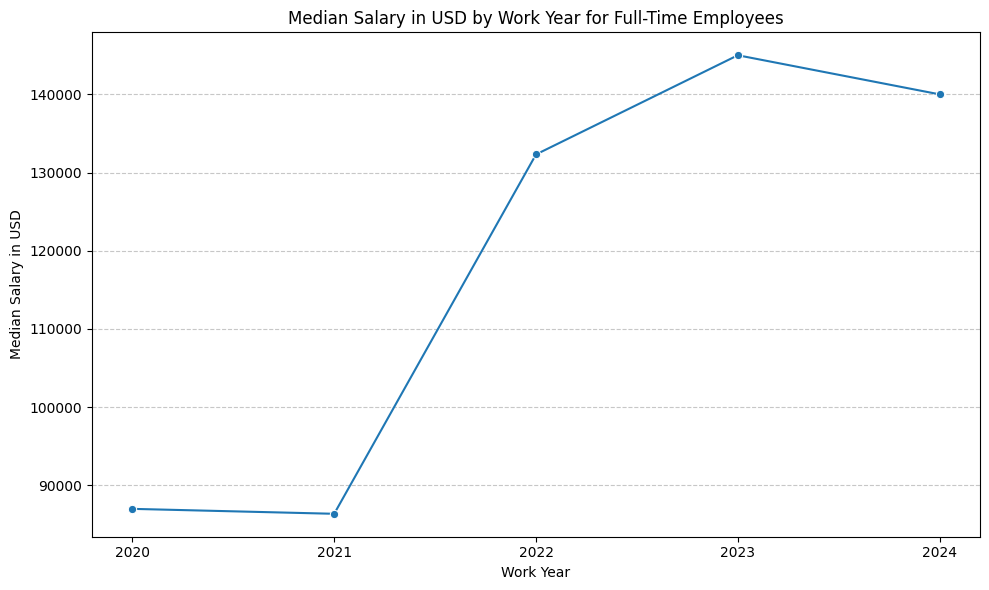

In [ ]:
median_salary_by_year = full_time_df.groupby('work_year')['salary_in_usd'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=median_salary_by_year, marker='o')
plt.title('Median Salary in USD by Work Year for Full-Time Employees')
plt.xlabel('Work Year')
plt.ylabel('Median Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(median_salary_by_year['work_year'])
plt.tight_layout()
plt.show()

## Factors Driving Salary Trends:

Several factors can contribute to the observed increase in median salaries for full-time employees:

1.  **Inflation and Cost of Living Increases:** Over time, the cost of living generally increases, leading companies to adjust salaries to maintain purchasing power for their employees.
2.  **Increased Demand for Skilled Labor:** If the demand for the specific skills represented by these full-time employees has grown (e.g., in technology, data science, AI), companies will offer higher salaries to attract and retain talent.
3.  **Talent Shortages:** Related to demand, if there's a shortage of qualified professionals in certain fields, salaries will naturally rise as companies compete for a limited pool of talent.
4.  **Economic Growth:** A strong economy generally leads to higher corporate profits, allowing companies to invest more in their workforce through increased compensation.
5.  **Industry Growth and Maturity:** As industries mature and become more profitable, they often have more capacity to offer competitive salaries.
6.  **Remote Work Opportunities:** The rise of remote work has broadened the talent pool for many companies but has also intensified competition for top talent, potentially driving up salaries, especially for in-demand roles.
7.  **Increased Value of Data-Related Roles:** Given that this dataset is related to data professionals, there has been a significant surge in the importance and complexity of data-related roles (e.g., AI Engineer, Data Scientist, Machine Learning Engineer), leading to higher compensation for these specialists.
8.  **Experience Level Progression:** As employees gain more experience, their salaries typically increase. If the dataset includes a growing proportion of more experienced workers over the years, this could also contribute to the median salary trend.

It's important to note that these factors can interact and vary in their impact depending on the specific industry, job roles, and economic conditions of a given period.